In [3]:
import glob
import pandas as pd
import seaborn as sns

In [4]:
accession_translator = {
    "GCF_009017415.1" : "Aspergillus flavus",
    "GCF_000143535.2" : "Botrytis cinerea",
    "GCF_033473495.1" : "Cercospora beticola",
    "GCF_000240135.3" : "Fusarium graminearum",
    "GCF_000146045.2" : "Saccharomyces cerevisiae",
    "GCF_000835755.1" : "Cryptococcus tetragattii",
    "GCF_021901695.1" : "Puccinia striiformis",
    "GCA_964035595.1" : "Somion occarium",
    "GCF_026210795.1" : "Rhizophagus irregularis",
}

In [13]:
dfs = []
for file in glob.glob("genome_features/*.tsv"):
    df = pd.read_csv(file, delimiter='\t')
    name = file.split('/')[1].replace(".tsv", "")
    df["genome"] = accession_translator[name]
    df["length"] = df["end"]-df["start"]+1
    dfs.append(df)
features = pd.concat(dfs)

/home/lisvad/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


[Text(0.5, 1.0, 'gene')]

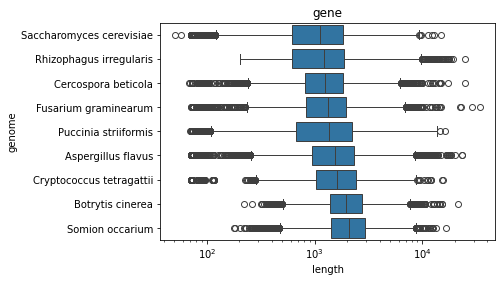

In [ ]:
data = features[features["feature"]=="gene"]

plot = sns.boxplot(data, y="genome",x="length", log_scale=True, order=data.groupby("genome")["length"].median().sort_values().index)
plot.set(title="gene")

/home/lisvad/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


[Text(0.5, 1.0, 'intergenic')]

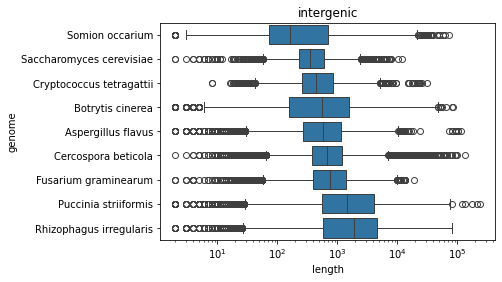

In [32]:
data = features[features["feature"]=="intergenic"]
plot = sns.boxplot(data, y="genome", x="length", log_scale=True, order=data.groupby("genome")["length"].median().sort_values().index)
plot.set(title="intergenic")

/home/lisvad/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


[Text(0.5, 1.0, 'exon')]

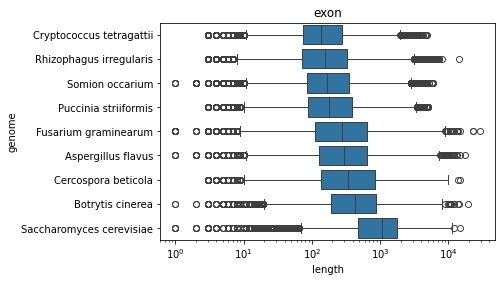

In [33]:
data = features[features["feature"]=="exon"]
plot = sns.boxplot(data, y="genome", x="length", log_scale=True, order=data.groupby("genome")["length"].median().sort_values().index)
plot.set(title="exon")

/home/lisvad/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


[Text(0.5, 1.0, 'CDS')]

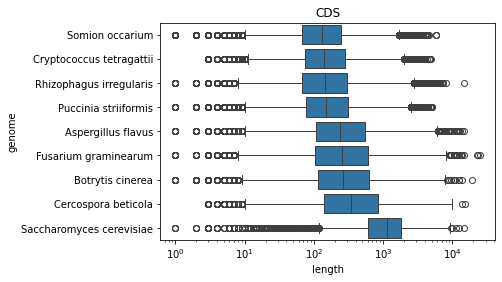

In [34]:
data = features[features["feature"]=="CDS"]
plot = sns.boxplot(data, y="genome", x="length", log_scale=True, order=data.groupby("genome")["length"].median().sort_values().index)
plot.set(title="CDS")

In [23]:
mRNA_counts = features[features["feature"]=="mRNA"].groupby("parent").value_counts()

/home/lisvad/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='count'>

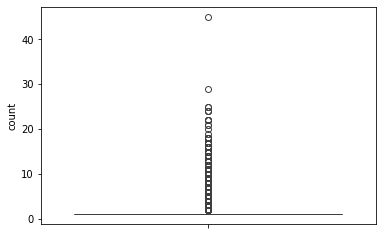

In [27]:
sns.boxplot(mRNA_counts)